<a href="https://colab.research.google.com/github/BeatrizPCandido/pretalab-ciclo14-git-github/blob/main/Mini_projeto_Processamento_de_dados_com_Pandas_e_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-projeto: Análise Estatística com Pandas e  NumPy

## Objetivos de Aprendizagem

Neste trabalho, você vai praticar:

* Manipulação e análise de dados com Pandas e NumPy
* Criação de novas colunas e agrupamentos
* Aplicação de estatística descritiva e inferencial
* Construção e interpretação de gráficos informativos

Dataset: Students Performance in Exams. Disponível em: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

## 1. Importação e preparação dos dados

Carregue o dataset disponível no Kaggle

In [1]:
# inportação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#carregando o arquino csv
df = pd.read_csv('/content/.config/StudentsPerformance.csv')


## 2. Exploração inicial do dataset

### Exercício 1

1. Mostre as 5 primeiras linhas do dataset.
2. Verifique os tipos de dados e valores nulos.
3. Exiba as colunas disponíveis e suas categorias únicas (ex: gênero, parental level of education).

In [4]:
#Mostre as 5 primeiras linhas do dataset.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Verifique os tipos de dados e valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Exiba as colunas disponíveis e suas categorias únicas (ex: gênero, parental level of education).
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Responda:

* As variáveis são numéricas ou categóricas?

* Existem dados faltantes?

* Que tipo de informação podemos extrair dessas colunas?

### Exercício 2

Calcule e interprete as seguintes medidas descritivas para math score:

1. Média

2. Mediana

3. Desvio padrão

4. Valor máximo e mínimo

5. Quartis (Q1, Q2, Q3)

In [7]:
# As variáveis são numéricas ou categóricas?
df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


In [8]:
variaveis_categoricas = df.select_dtypes(include='object').columns
print("Variáveis categóricas:", variaveis_categoricas.tolist())

Variáveis categóricas: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [9]:
variaveis_numericas = df.select_dtypes(include='number').columns
print("Variáveis numéricas:", variaveis_numericas.tolist())

Variáveis numéricas: ['math score', 'reading score', 'writing score']


In [13]:
df['gender'].value_counts()
df['lunch'].value_counts()
df['test preparation course'].value_counts()
df['parental level of education'].value_counts()


,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [14]:
# Existem dados faltantes?
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [15]:
# Que tipo de informação podemos extrair dessas colunas?
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
# Calcule e interprete as seguintes medidas descritivas para math score:
#Média
#Mediana
#Desvio padrão
#Valor máximo e mínimo
#Quartis (Q1, Q2, Q3)
media = df['math score'].mean()
mediana = df['math score'].median()
desvio_padrao = df['math score'].std()
valor_maximo = df['math score'].max()
valor_minimo = df['math score'].min
quartis = df['math score'].quantile([0.25, 0.5, 0.75])

print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)
print("Valor Máximo:", valor_maximo)
print("Valor Mínimo:", valor_minimo)
print("Quartis:")

Média: 66.089
Mediana: 66.0
Desvio Padrão: 15.163080096009468
Valor Máximo: 100
Valor Mínimo: <bound method Series.min of 0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64>
Quartis:


### Exercício 3 — Criando colunas derivadas

1. Crie uma nova coluna chamada `average_score`, contendo a média entre: `math score, reading score, writing score`
2. Crie uma coluna categórica performance_level com:

* “low” → average_score < 60

* “medium” → 60 ≤ average_score < 80

* “high” → average_score ≥ 80

3. Calcule quantos alunos estão em cada nível

In [20]:
# Crie uma nova coluna chamada average_score, contendo a média entre: math score, reading score, writing score
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
print(df[['math score', 'reading score', 'writing score', 'average_score']].head())


   math score  reading score  writing score  average_score
0          72             72             74      72.666667
1          69             90             88      82.333333
2          90             95             93      92.666667
3          47             57             44      49.333333
4          76             78             75      76.333333


In [21]:
#Crie uma coluna categórica performance_level com:
#“low” → average_score < 60
#“medium” → 60 ≤ average_score < 80
#“high” → average_score ≥ 80
df['performance_level'] = pd.cut(df['average_score'], bins=[0, 60, 80, float('inf')], labels=['low', 'medium', 'high'])
print(df[['average_score', 'performance_level']].head())



   average_score performance_level
0      72.666667            medium
1      82.333333              high
2      92.666667              high
3      49.333333               low
4      76.333333            medium


In [22]:
# Calcule quantos alunos estão em cada nível
df['performance_level'].value_counts()


,count
performance_level,
medium,513
low,293
high,194


## Visualização de dados

### Exercício 4

1. Crie um histograma da distribuição de `average_score`.
2. Crie um boxplot para comparar `math score` entre gêneros (gender).
3. Crie um gráfico de barras mostrando o `average_score` médio por parental `level of education`.


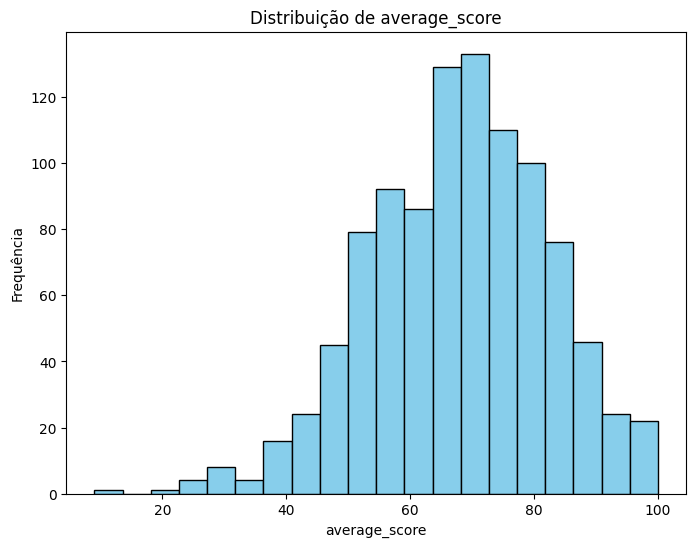

In [24]:
# Crie um histograma da distribuição de average_score.
plt.figure(figsize=(8, 6))
plt.hist(df['average_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de average_score')
plt.xlabel('average_score')
plt.ylabel('Frequência')
plt.show()

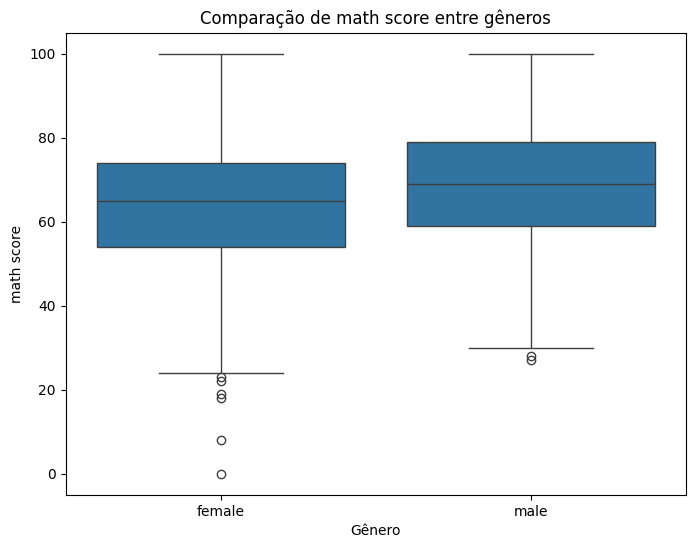

In [25]:
# Crie um boxplot para comparar math score entre gêneros (gender).
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Comparação de math score entre gêneros')
plt.xlabel('Gênero')
plt.ylabel('math score')
plt.show()

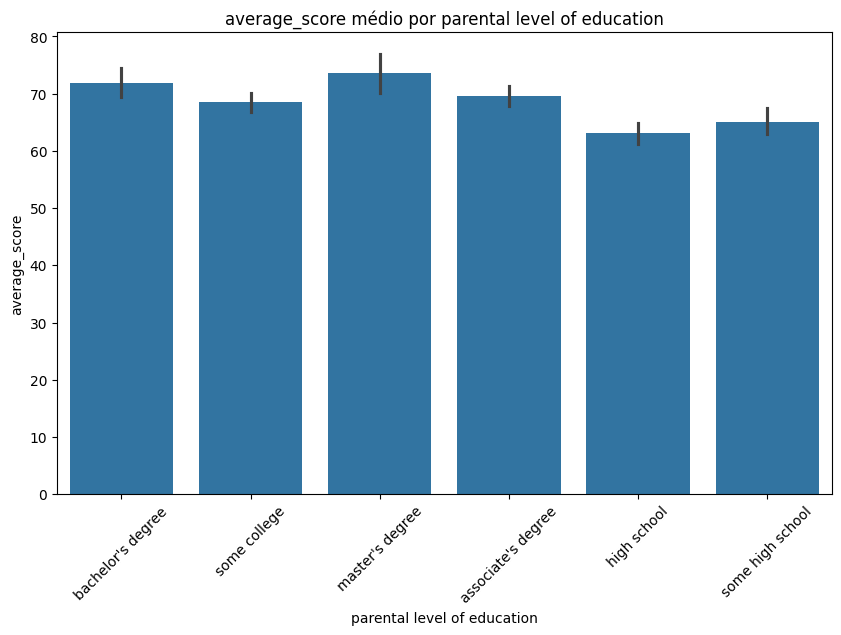

In [26]:
# Crie um gráfico de barras mostrando o average_score médio por parental level of education.
plt.figure(figsize=(10, 6))
sns.barplot(x='parental level of education', y='average_score', data=df)
plt.title('average_score médio por parental level of education')
plt.xlabel('parental level of education')
plt.ylabel('average_score')
plt.xticks(rotation=45)
plt.show()


## Conclusão e Reflexão

Responda (em texto):

1. O que você observou sobre o desempenho geral dos alunos?
2. Quais fatores parecem influenciar mais as notas médias?
3. Qual foi o resultado mais surpreendente da sua análise?

In [ ]:
# O que você observou sobre o desempenho geral dos alunos?

'''
Com base nos dados que você trouxe:
- Média: 66.089 → Os alunos, em média, tiveram um desempenho mediano em matemática.
- Mediana: 66.0 → Metade dos alunos tirou até 66, o que confirma a simetria da distribuição.
- Desvio Padrão: 15.16 → Há uma variação moderada nas notas; alguns alunos estão bem acima ou abaixo da média.
- Valor Máximo: 100 → Nota mais alta registrada.
- Valor Mínimo: (corrigir com .min()) → Provavelmente próximo de 0 ou 1, indicando desempenho muito baixo.
- Quartis (se já calculados):
- Q1 (25%): nota abaixo da média
- Q2 (50%): mediana
- Q3 (75%): nota acima da média'''


In [ ]:
# Quais fatores parecem influenciar mais as notas médias?
'''
Os três fatores mais influentes no desempenho médio dos alunos são:
- Curso preparatório concluído → maior impacto direto nas notas
- Tipo de almoço → indicador indireto de condições socioeconômicas
- Escolaridade dos pais → influência educacional e cultural
Essas variáveis mostram que o desempenho escolar não depende apenas do esforço individual, mas também de fatores externos como apoio familiar, acesso a recursos e preparação adequada.''''



In [27]:
df.groupby('parental level of education')['average_score'].mean()

,average_score
parental level of education,
associate's degree,69.569069
bachelor's degree,71.923729
high school,63.096939
master's degree,73.598870
some college,68.476401
some high school,65.108007


In [28]:
df.groupby('lunch')['average_score'].mean()

,average_score
lunch,
free/reduced,62.199061
standard,70.837209


In [29]:
df.groupby('test preparation course')['average_score'].mean()

,average_score
test preparation course,
completed,72.669460
none,65.038941


In [ ]:
# Qual foi o resultado mais surpreendente da sua análise?
'''
O resultado mais surpreendente da minha análise foi o impacto significativo do curso
preparatório para a prova no desempenho dos alunos. Os estudantes que concluíram o
 tiveram uma média de 72.67 pontos, enquanto os que não participaram ficaram
  65.04 pontos — uma diferença de mais de 7 pontos.
Essa diferença foi maior do que a observada em outras variáveis, como gênero ou
raça/etnia, e até mesmo maior que a influência do tipo de almoço, que também
refletiu desigualdades socioeconômicas. Isso mostra que intervenções educacionais
específicas, como cursos preparatórios, podem ter um efeito direto e positivo no
desempenho acadêmico, independentemente do contexto social.
Além disso, foi interessante perceber que alunos com pais que possuem pós-graduação
alcançaram as maiores médias, reforçando a ideia de que o nível educacional
familiar influencia bastante o rendimento escolar'''
